# Environment Testing

In [1]:
from gridworld_ctf_mvp import GridworldCtf
import numpy as np

In [2]:
# create env
config = {
            'GAME_MODE':'static',
            'GRID_SIZE':6,
            'AGENT_CONFIG':{
                0: {'team':0, 'type':0},
                1: {'team':1, 'type':0},
                # 2: {'team':0, 'type':0},
                # 3: {'team':1, 'type':0},
            },
            'DROP_FLAG_WHEN_NO_HP':False
        }


env = GridworldCtf(**config)

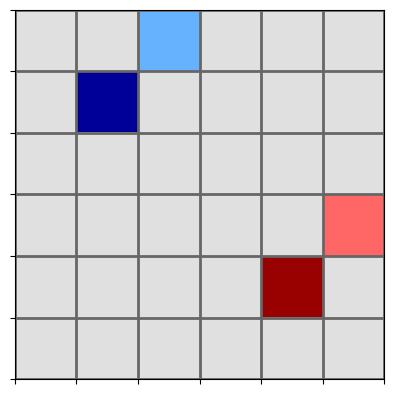

In [3]:
env.render()

In [4]:
env.standardise_state(0, use_ego_state=True)

array([[[[0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]],

        [[0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0]]]], dtype=uint8)

In [5]:
env.standardise_state(1, use_ego_state=False)

array([[[[0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]],

        [[0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]]]], dtype=uint8)

In [6]:
env.standardise_state(1, use_ego_state=True).shape

(1, 5, 6, 6)

In [7]:
env.standardise_state(0, use_ego_state=False).shape

(1, 4, 6, 6)

In [8]:

def get_env_metadata_local(env):
    """
    Return local metadata from the environment.
    """

    agent_hp = np.array([env.agent_hp[kv[1]]/env.AGENT_TYPE_HP[env.AGENT_TYPES[i]] \
        for i, kv in enumerate(env.AGENT_TYPES.items())], dtype=np.uint8)
    
    
    print(env.agent_teams_np)
    print(env.agent_types_np)
    print(env.has_flag)
    print(agent_hp)

get_env_metadata_local(env)

[0 1]
[1 0 0 1 0 0]
[0 0]
[1 1]


In [15]:
metadata_local = env.get_env_metadata_local(0)
print(metadata_local)
print(metadata_local.shape)

[[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.]]
(1, 12)


In [16]:
metadata_global = env.get_env_metadata_global([0, 0])
print(metadata_global)
print(metadata_global.shape)

[[[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
   0. 0. 0. 0. 0.]]]
(1, 1, 28)


In [11]:
env.AGENT_TYPES.values()

dict_values([0, 0])

In [12]:
env.get_env_dims()

((1, 5, 6, 6), (1, 4, 6, 6), (1, 12), (1, 28))

#### Step through MAPPO training loop